# KPMG Virtual Internship-Module 1 -Data Quality Assesment

## Importing libraries

PANDAS,NUMPY for data manuplation.

Matplotlib,seaborn module for Data Visualisation.

os for path setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns 
import warnings

In [2]:
data_dir ='C:\\Users\\Keerthi\\Desktop\\04-Keerthi\\KPMG'
os.chdir(data_dir)

As the first column can be ignored, importing the data using pandas library from the second coulmn


In [3]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='Transactions',)
customer_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='CustomerDemographic') 
customer_address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='CustomerAddress')

In [4]:
print(' The shape of Transactions is ',transactions.shape)
print('Customer Transactions Information:-',transactions.info())

 The shape of Transactions is  (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB
Customer Transactions Information:- None


In [5]:
print(' The shape of Customer Demographics is ',customer_demographic.shape)
print('Customer Customer Demographics Information:-',customer_demographic.info()) 

 The shape of Customer Demographics is  (4000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object

In [6]:
print(' The shape of Customer Address is ',customer_address.shape)
print('Customer Customer Address Information:-',customer_address.info()) 

 The shape of Customer Address is  (3999, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB
Customer Customer Address Information:- None


### Observations:

    * Columns present in new_customer_lists are combination of Customer Demographic with the Customer Address but Customer Id is missing
    * Unnamed columns in new_customer_lists can be dropped

# Merging Customer data

In [7]:
set(customer_demographic.customer_id).symmetric_difference(customer_address.customer_id)


{3, 10, 22, 23, 4001, 4002, 4003}

###### We need to merge the Customer Demographic with the Customer Address table before joining with New Customer List

In [8]:
customer = pd.merge(customer_demographic, customer_address, how='left', on='customer_id')


In [9]:
customer.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  \
0                                                 "'      Yes    11.0   
1                       <script>alert('hi')</script>      Yes    16.0   
2                                2018-02-01 00:00:00      Yes    15.0   
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0   
4                                                NIL      Yes     8.0   

               address  postcode            state    country  \
0   060 Morning Avenue    2016.0  New South Wales  Australia   
1  6 Meadow Vale Court    2153.0  New South Wales  Australia   
2                  NaN       NaN              NaN        NaN   
3   0 Holy Cross Court    4211.0              QLD  Australia   
4  17979 Del Mar Point    2448.0  New South Wales  Australia   

   property_valuation  
0                10.0  
1                10.0  
2                 NaN  
3                 9.0  
4                 4.0

In [10]:
customer['default'].value_counts()

100                                                                                                                                                                                                                   113
1                                                                                                                                                                                                                     112
-1                                                                                                                                                                                                                    111
-100                                                                                                                                                                                                                   99
â°â´âµâââ                                                                                                                       

#### 'default' Column doesn't provide any additional information, So dropping the column

In [11]:
drop_col=['default']
customer = customer.drop(drop_col, axis=1)

## Data preprocessing - Customer Data

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

    We will have to check for the following
        (i) Missing values analysis
        (ii) Outliers analysis
        (iii) Columns Analysis

### a) Missing Values 

In [12]:
print(customer.isnull().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64


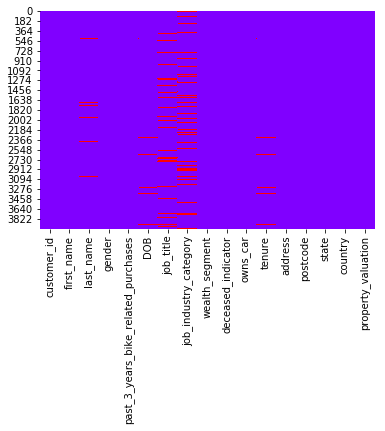

In [13]:
sns.heatmap(customer.isnull(), cbar=False,cmap='rainbow')

Observations :
        * DOB will be converted to age and handled.
        * Rank, Value columns can be dropped
        * Update last_name,Job_title and job_industry_category with 'unknown'
        * Drop rows with NA values for address , country
        * Update tenure with mean value.

#### Update Null values of job_title,job_industry_category,last_name with Unknown

In [14]:

customer['job_title'].fillna('Unknown', inplace=True)
customer['job_industry_category'].fillna('Unknown', inplace=True)
customer['last_name'].fillna('Unknown', inplace=True)

#### Update Null values of Tenure with mean

Check

In [15]:
# tenure 
customer['tenure'].fillna((customer['tenure'].mean()), inplace=True)

### Converting DOB to Age

In [16]:
def age(date):
    age=(pd.to_datetime('today').year-pd.to_datetime(date).year)
    return age
customer['age'] = customer['DOB'].apply(age)
customer= customer.drop('DOB',axis=1)

In [17]:
# Filling Null values with mode 
customer['age'].fillna((customer['age'].mode()[0]), inplace=True)

In [18]:
customer.loc[(customer["age"] == 177)]

customer_id first_name last_name gender  \
33           34   Jephthah  Bachmann      U   

    past_3_years_bike_related_purchases        job_title  \
33                                   59  Legal Assistant   

   job_industry_category     wealth_segment deceased_indicator owns_car  \
33                    IT  Affluent Customer                  N       No   

    tenure         address  postcode state    country  property_valuation  \
33    20.0  833 Luster Way    4005.0   QLD  Australia                 8.0   

      age  
33  177.0

We can observe one data which is outlier with 177 years old, this row will be dropped.

In [19]:
customer = customer[customer.age != 177]

### Drop rows with null values

In [20]:
print('Number of rows in Customer -->',customer.shape)


Number of rows in Customer --> (3999, 17)


In [21]:
customer['gender'].value_counts()

Female    2037
Male      1872
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [22]:
customer=customer.dropna()

### Checking for Null values 

In [23]:
print(customer.isnull().sum())

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
age                                    0
dtype: int64


### b) Outliers 

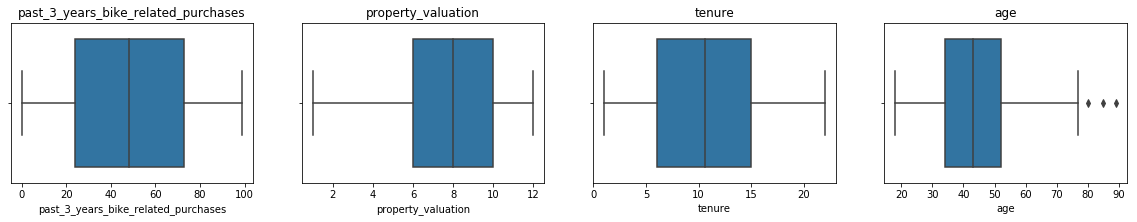

In [24]:
plt.figure(figsize=(20, 10))
X=customer
col = ['past_3_years_bike_related_purchases','property_valuation','tenure','age']
# i: index
for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = customer[col]
    sns.boxplot(x)
    plt.title(col)

### Exploring for duplicate

In [25]:
customer[customer.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
address                                0.0
postcode                               0.0
state                                  0.0
country                                0.0
property_valuation                     0.0
age                                    0.0
dtype: float64

### Summary Statistics


summary statistics can be created for pandas dataframe using describe method

In [26]:
print(customer.describe())

       customer_id  past_3_years_bike_related_purchases       tenure  \
count  3995.000000                          3995.000000  3995.000000   
mean   2002.980726                            48.878348    10.653608   
std    1153.434729                            28.727785     5.595327   
min       1.000000                             0.000000     1.000000   
25%    1004.500000                            24.000000     6.000000   
50%    2003.000000                            48.000000    10.657041   
75%    3001.500000                            73.000000    15.000000   
max    4000.000000                            99.000000    22.000000   

          postcode  property_valuation          age  
count  3995.000000         3995.000000  3995.000000  
mean   2985.480350            7.513892    42.912390  
std     844.897454            2.825769    12.474163  
min    2000.000000            1.000000    18.000000  
25%    2200.000000            6.000000    34.000000  
50%    2768.000000         

### Exploring Columns

#### Age

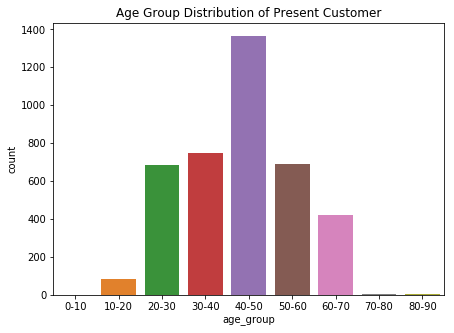

In [27]:
customer['age_group'] = pd.cut(x=customer['age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30',\
                                                            '30-40','40-50','50-60','60-70','70-80','80-90'], right=True)
fig,ax=plt.subplots(figsize=(7,5))
sns.countplot(x ='age_group',data=customer)
plt.title('Age Group Distribution of Present Customer')
plt.show()

### State

In [28]:
customer ['state'].value_counts()

NSW                2052
VIC                 939
QLD                 836
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [29]:
customer['state'].replace({'New South Wales': 'NSW', 'Victoria':'VIC'}, inplace=True)
customer ['state'].value_counts()

NSW    2138
VIC    1021
QLD     836
Name: state, dtype: int64

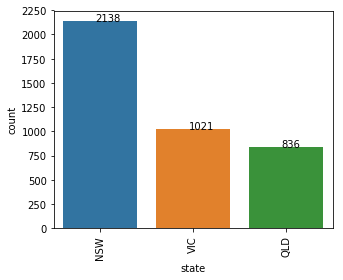

In [30]:
plt.figure(figsize=(5,4))
ax=sns.countplot("state", data = customer,order = customer['state'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Country

In [31]:
customer['country'].value_counts()

Australia    3995
Name: country, dtype: int64

### Deceased 

In [32]:
customer['deceased_indicator'].value_counts()


N    3993
Y       2
Name: deceased_indicator, dtype: int64

As we have 2 rows in Y category , It doesnt provide much insight. Dropping the column

In [33]:
customer.drop(columns=['deceased_indicator'], inplace = True)


### Gender

In [34]:
customer['gender'].value_counts()

Female    2035
Male      1870
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [35]:
customer['gender'].replace({'M': 'Male', 'Femal':'Female','F':"Female",'U':"Unknown"}, inplace=True)


In [36]:
customer['gender'].value_counts()

Female     2037
Male       1871
Unknown      87
Name: gender, dtype: int64

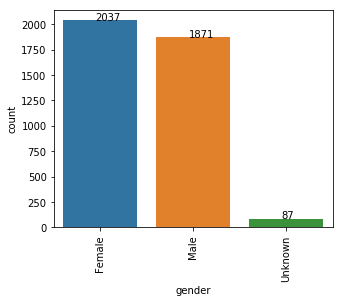

In [37]:
plt.figure(figsize=(5,4))
ax=sns.countplot("gender", data = customer,order = customer['gender'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Job Industry Category

In [38]:
customer['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    773
Unknown               655
Health                602
Retail                358
Property              266
IT                    221
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

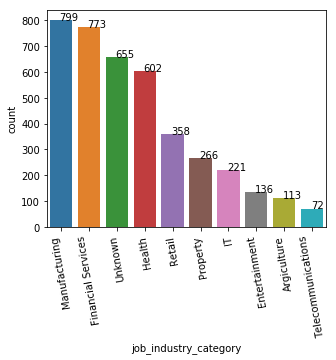

In [39]:
plt.figure(figsize=(5,4))
ax=sns.countplot("job_industry_category", data = customer,order = customer['job_industry_category'].value_counts().index)
plt.xticks(rotation=100)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Job Title

In [40]:
customer['job_title'].value_counts()

Unknown                                 504
Business Systems Development Analyst     45
Tax Accountant                           44
Social Worker                            44
Internal Auditor                         42
General Manager                          40
Recruiting Manager                       40
Legal Assistant                          40
Structural Engineer                      39
Associate Professor                      39
Sales Representative                     38
Junior Executive                         38
Desktop Support Technician               38
Senior Financial Analyst                 37
Technical Writer                         37
Dental Hygienist                         37
Executive Secretary                      37
Chemical Engineer                        37
Registered Nurse                         36
Senior Developer                         36
Product Engineer                         36
Cost Accountant                          36
Assistant Professor             

### Own Car

In [41]:
customer['owns_car'].value_counts()

Yes    2021
No     1974
Name: owns_car, dtype: int64

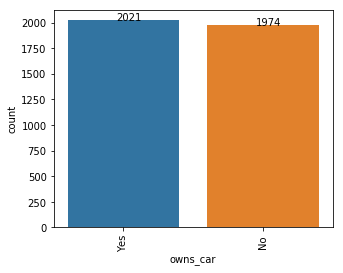

In [42]:
plt.figure(figsize=(5,4))
ax=sns.countplot("owns_car", data = customer,order = customer['owns_car'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Wealth Segment

In [43]:
customer['wealth_segment'].value_counts()

Mass Customer        1997
High Net Worth       1020
Affluent Customer     978
Name: wealth_segment, dtype: int64

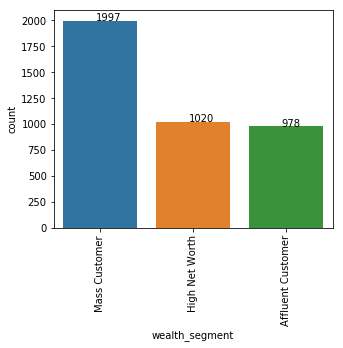

In [44]:
plt.figure(figsize=(5,4))
ax=sns.countplot("wealth_segment", data = customer,order = customer['wealth_segment'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Correlation Matrix

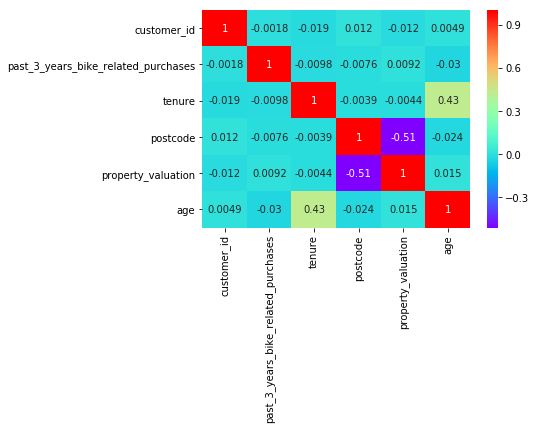

In [45]:
customer_cor = customer.corr()
sns.heatmap(customer_cor, annot=True,cmap='rainbow')

We can observe that Property_valuation and Postcode are in negative correlation

Tenure and age are in postive correlation

## Data preprocessing - Transactions Data


In [46]:
print(' The shape of column is ',transactions.shape)
transactions.info()

 The shape of column is  (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [47]:
transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0


For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

    We will have to check for the following
        (i) Missing values analysis
        (ii) Outliers analysis
        (iii) Columns Analysis

### a)Missing Values


In [48]:
transactions.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

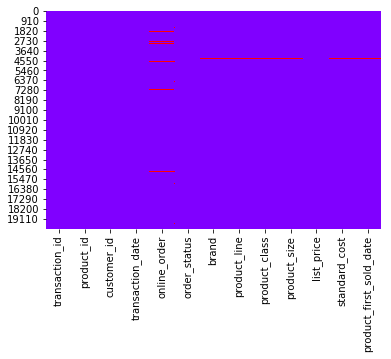

In [49]:
sns.heatmap(transactions.isnull(), cbar=False,cmap='rainbow')

### Observations:

online_order               360
brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197    ,

### Null value Analysis 

#### Droping Null values in     online_order,    standard_cost,    product_first_sold_date

In [50]:
transactions.dropna(subset= ['online_order'], inplace = True) 
transactions.dropna(subset= ['standard_cost'], inplace = True) 
transactions.dropna(subset= ['product_first_sold_date'], inplace = True) 

#### Assigning Null values of     brand,    product_line,    product_size with Unknown

In [51]:
transactions['brand'].fillna(value = 'Unknown', inplace = True)
transactions['product_line'].fillna(value = 'Unknown', inplace = True)
transactions['product_size'].fillna(value = 'Unknown', inplace = True)

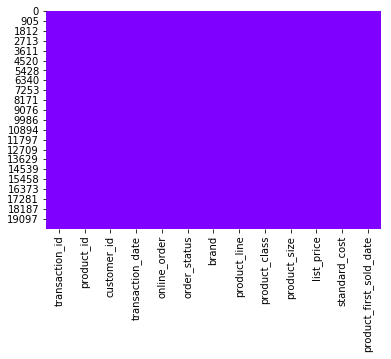

In [52]:
sns.heatmap(transactions.isnull(), cbar=False,cmap='rainbow')

### Outliers 

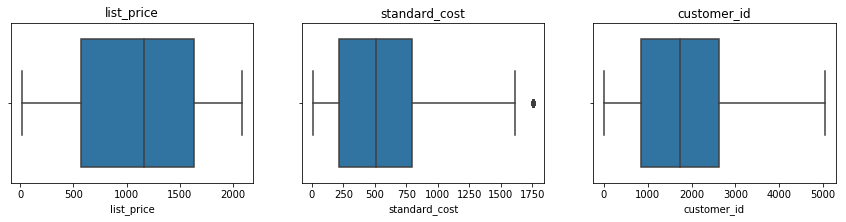

In [53]:
plt.figure(figsize=(20, 10))
X=transactions
col = ['list_price','standard_cost','customer_id']
# i: index
for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = transactions[col]
    sns.boxplot(x)
    plt.title(col)


### Exploring Duplicate Values

In [54]:
transactions[transactions.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

### Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [55]:
print(transactions.describe())


       transaction_id    product_id   customer_id  online_order    list_price  \
count    19445.000000  19445.000000  19445.000000  19445.000000  19445.000000   
mean      9989.257393     45.797737   1739.467267      0.500849   1107.337193   
std       5779.669087     30.571996   1011.889153      0.500012    582.662400   
min          1.000000      0.000000      1.000000      0.000000     12.010000   
25%       4976.000000     18.000000    857.000000      0.000000    575.270000   
50%       9985.000000     45.000000   1741.000000      1.000000   1163.890000   
75%      14997.000000     72.000000   2615.000000      1.000000   1635.300000   
max      20000.000000    100.000000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19445.000000             19445.000000  
mean      555.585260             38201.758653  
std       405.596541              2878.067854  
min         7.210000             33259.000000  
25%       215.140000          

We can observe that customer_id has a outlier value '5034'

### Exploring Columns

In [56]:
transactions['customer_id'].max()

5034

We can see that Customer_id doesnt existis so this row will be dropped

In [57]:
transactions = transactions[transactions.customer_id != 5034]

In [58]:
transactions['order_status'].value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

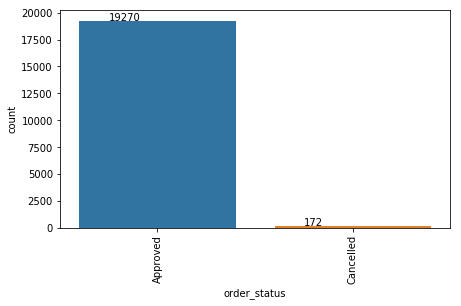

In [59]:
plt.figure(figsize=(7,4))
ax=sns.countplot("order_status", data = transactions,order = transactions['order_status'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [60]:
transactions['brand'].value_counts()

Solex             4168
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2992
Trek Bicycles     2931
Norco Bicycles    2862
Name: brand, dtype: int64

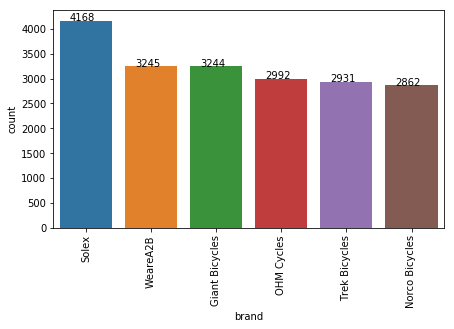

In [61]:
plt.figure(figsize=(7,4))
ax=sns.countplot("brand", data = transactions,order = transactions['brand'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [62]:
transactions['product_line'].value_counts()

Standard    13919
Road         3892
Touring      1213
Mountain      418
Name: product_line, dtype: int64

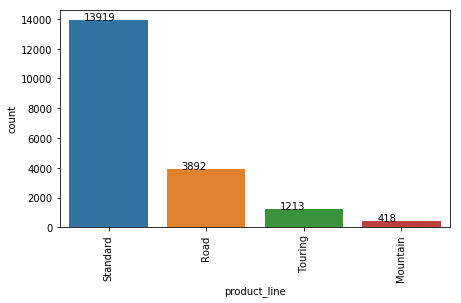

In [63]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_line", data = transactions,order = transactions['product_line'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [64]:
transactions['product_class'].value_counts()

medium    13584
high       2952
low        2906
Name: product_class, dtype: int64

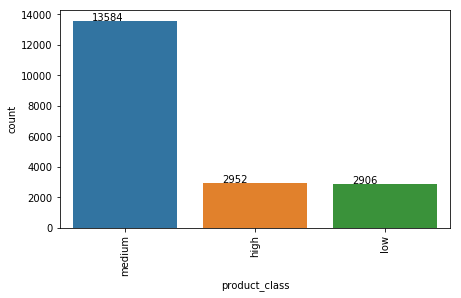

In [65]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_class", data = transactions,order = transactions['product_class'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [66]:
transactions['product_size'].value_counts()

medium    12764
large      3900
small      2778
Name: product_size, dtype: int64

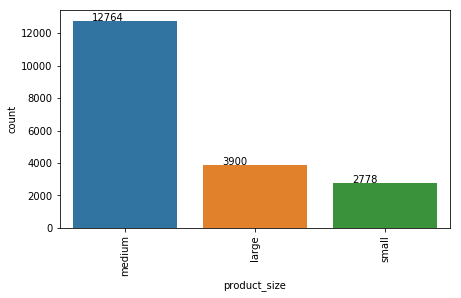

In [67]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_size", data = transactions,order = transactions['product_size'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

#### Converting product_first_sold_date to date

In [68]:
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
transactions['product_first_sold_date'].head()

C:\Users\Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

### Correlation Matrix

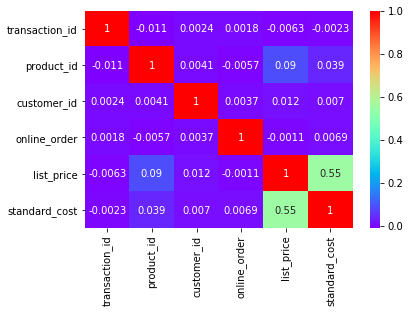

In [69]:
transactions_corr = transactions.corr()
sns.heatmap(transactions_corr, annot=True,cmap='rainbow')

We can observe that list_price and standard cost are in postive correlaion. They can be used in calculating profit

#### Data preprocessing -New Customer Data

In [70]:
new_customer_lists = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='NewCustomerList')


In [71]:
new_customer_lists

first_name     last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie       Brister    Male                                   86   
1        Morly        Genery    Male                                   69   
2      Ardelis     Forrester  Female                                   10   
3       Lucine         Stutt  Female                                   64   
4      Melinda        Hadlee  Female                                   34   
5        Druci       Brandli  Female                                   39   
6     Rutledge         Hallt    Male                                   23   
7       Nancie          Vian  Female                                   74   
8         Duff     Karlowicz    Male                                   50   
9      Barthel        Docket    Male                                   72   
10    Rockwell        Matson    Male                                   94   
11     Wheeler       Winward    Male                                   48   
12        Olag           NaN    Male                                   60   
13       Melba      Spellacy  Female                                   38   
14      Mandie        Feares  Female                                   32   
15       Dukie         Swire    Male                                   88   
16    Marcelia     Monkleigh  Female                                   61   
17   Winnifred  Beswetherick  Female                                   83   
18      Odilia         Quick  Female                                   65   
19       Karly     Willavize  Female                                    2   
20      Teddie      Burchill    Male                                   11   
21      Gaston     Dallaghan    Male                                   44   
22        Otis         Ottey    Male                                   26   
23    Tabbatha       Averill  Female                                    5   
24       Brena     Schnitter  Female                                   78   
25      Rourke      Gillbard    Male                                   11   
26       Dyane       Burwell  Female                                   19   
27    Claudine      Barstowk  Female                                   71   
28     Blinnie          Roze  Female                                   84   
29       Rhona     De Freyne  Female                                   45   
..         ...           ...     ...                                  ...   
970      Mavra         Finan  Female                                   30   
971     Frieda       Tavinor  Female                                   43   
972    Ellwood        Budden    Male                                   82   
973       Alex      Patshull  Female                                   37   
974    Aundrea      Outridge  Female                                   77   
975       Amby        Bodega    Male                                   63   
976       Esme      Pilipets    Male                                   15   
977    Beverly       Domnick  Female                                   56   
978    Artemis       Swanson    Male                                   77   
979     Daryle     Marginson    Male                                   93   
980       Tyne       Anshell  Female                                   71   
981      Leona      Shorrock  Female                                   83   
982  Bertrando        Carass    Male                                   45   
983    Augusta         Munns  Female                                    5   
984    Pauline      Dallosso       U                                   82   
985   Lauralee         Fudge  Female                                   83   
986   Consalve        Ballay    Male                                   41   
987      Lolly        Prewer  Female                                   44   
988       Vyky          Pegg  Female                                   64   
989     Kellen      Pawelski  Female                                   83   


### Comparing First and Last Names in two tables to find reapetitive customer information

In [72]:
Df= customer[['first_name','last_name']].isin(new_customer_lists[['first_name','last_name']])
Df.head()

first_name  last_name
0       False      False
1       False      False
3       False      False
4       False      False
5       False      False

In [73]:
Df.loc[(Df["first_name"] == True) & (Df["last_name"] == True)]

Empty DataFrame
Columns: [first_name, last_name]
Index: []

* Observations :
        * The customers present in customer_demographic and new_customer_lists are entirely different. 
        * Adding Customer_id with serial number starting from 4004, As 4003 was the last customer_id which is used in                        customer_demographic
        

### Adding customer_id to new_customer_lists

In [74]:
new_customer_lists.insert(0, 'customer_id', range(4004, 4004 + len(new_customer_lists)))

In [75]:
new_customer_lists.head()

customer_id first_name  last_name  gender  \
0         4004    Chickie    Brister    Male   
1         4005      Morly     Genery    Male   
2         4006    Ardelis  Forrester  Female   
3         4007     Lucine      Stutt  Female   
4         4008    Melinda     Hadlee  Female   

   past_3_years_bike_related_purchases        DOB                   job_title  \
0                                   86 1957-07-12             General Manager   
1                                   69 1970-03-22         Structural Engineer   
2                                   10 1974-08-28      Senior Cost Accountant   
3                                   64 1979-01-28  Account Representative III   
4                                   34 1965-09-21           Financial Analyst   

  job_industry_category     wealth_segment deceased_indicator  ... state  \
0         Manufacturing      Mass Customer                  N  ...   QLD   
1              Property      Mass Customer                  N  ...   NSW   
2    Financial Services  Affluent Customer                  N  ...   VIC   
3         Manufacturing  Affluent Customer                  N  ...   QLD   
4    Financial Services  Affluent Customer                  N  ...   NSW   

     country property_valuation  Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0  Australia                  6         1.01      1.2625    1.578125   
1  Australia                 11         0.46      0.4600    0.575000   
2  Australia                  5         0.97      0.9700    0.970000   
3  Australia                  1         0.67      0.8375    0.837500   
4  Australia                  9         1.10      1.1000    1.375000   

   Unnamed: 19  Unnamed: 20  Rank     Value  
0     1.341406            1     1  1.718750  
1     0.488750            1     1  1.718750  
2     0.970000            1     1  1.718750  
3     0.837500            4     4  1.703125  
4     1.375000            4     4  1.703125  

[5 rows x 24 columns]

In [76]:
print('shape of data -->',new_customer_lists.shape)

shape of data --> (1000, 24)


In [77]:
print('\nColumns of New Customer data\n -->',new_customer_lists.columns)


Columns of New Customer data
 --> Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')


In [78]:
new_customer_lists.dtypes

customer_id                                     int32
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                 

## Data preprocessing - Customer Data

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

    We will have to check for the following
        (i) Missing values analysis
        (ii) Outliers analysis
        (iii) Columns Analysis

### a) Missing Values 

In [79]:
print(new_customer_lists.isnull().sum())

customer_id                              0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value      

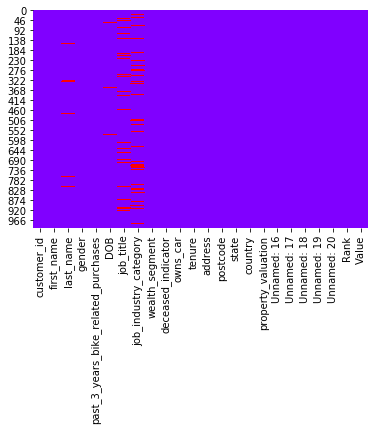

In [80]:
sns.heatmap(new_customer_lists.isnull(), cbar=False,cmap='rainbow')

Observations :
        * DOB will be converted to age and mode value is imputed.
        * Rank, Value columns are be dropped
        * Update last_name,Job_title and job_industry_category with 'unknown'
        * Drop rows with NA values for address , country
        * Update tenure with mean value.

#### Drop Rank, Value ,unnamed columns 

In [81]:

drop_col=['Rank','Value','Unnamed: 16' ,'Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_lists = new_customer_lists.drop(drop_col, axis=1)

#### Update Null values of job_title,job_industry_category,last_name with Unknown

In [82]:

new_customer_lists['job_title'].fillna('Unknown', inplace=True)
new_customer_lists['job_industry_category'].fillna('Unknown', inplace=True)
new_customer_lists['last_name'].fillna('Unknown', inplace=True)

### Converting DOB to Age

In [83]:
def age(date):
    age=(pd.to_datetime('today').year-pd.to_datetime(date).year)
    return age
new_customer_lists['age'] = new_customer_lists['DOB'].apply(age)
new_customer_lists= new_customer_lists.drop('DOB',axis=1)

In [84]:
# Filling Null values with mode 
new_customer_lists['age'].fillna((new_customer_lists['age'].mode()[0]), inplace=True)

### Merging customer information with Transactions


In [85]:

data = transactions.merge(customer, how='inner', on='customer_id')

print('Shape of the Dataset-->',data.shape)
print ('Columns names -->', (data.columns))
print ('Columns Datatype -->', data.dtypes)

Shape of the Dataset--> (19408, 29)
Columns names --> Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation', 'age',
       'age_group'],
      dtype='object')
Columns Datatype --> transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line  

# Exploratory Data Analysis 

https://github.com/Master-csm/Marketing-Strategy-Recommender/blob/master/KPMG%20-%20module%202.ipynb

#### We can calculate profit for each order


In [86]:
transactions['profit'] = transactions['list_price']-transactions['standard_cost']


C:\Users\Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

### We will analayse the data based on 3 levels :
    (i)Brand Analysis
    (ii) Gender Analysis
    (iii) Geographic Analysis
    (iv) Age Group Analysis

### Brand Analysis

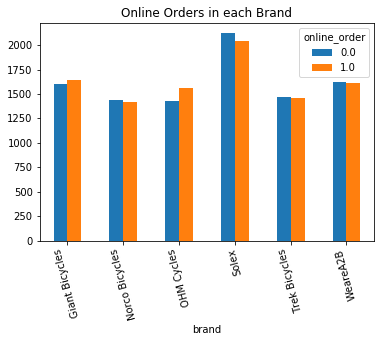

In [88]:
ax=pd.crosstab(data.brand, data.online_order).plot(kind='bar', stacked=False)
plt.xticks(rotation=105)
plt.title('Online Orders in each Brand')
plt.show()

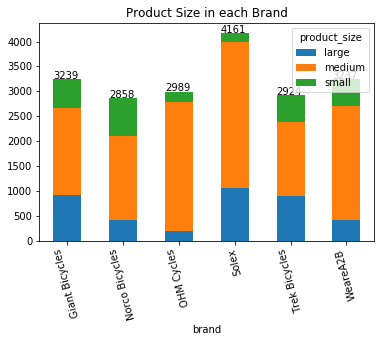

In [89]:
#plt.figure(figsize=(20,20))
pd.crosstab(data.brand, data.product_size).plot(kind='bar', stacked=True)
plt.xticks(rotation=105)
for i, v in enumerate(data.groupby('brand') \
                      .agg({'product_size': lambda x: len(x)})['product_size']):
    plt.text(i - .25, v + 10, int(v), color='black')
#axes = plt.gca()
plt.title('Product Size in each Brand')
plt.show()

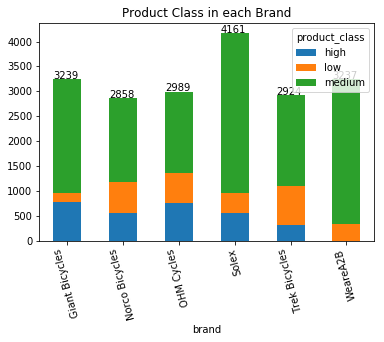

In [90]:
pd.crosstab(data.brand, data.product_class).plot(kind='bar', stacked=True)
plt.xticks(rotation=105)
plt.title('Product Class in each Brand')
for i, v in enumerate(data.groupby('brand') \
                      .agg({'product_class': lambda x: len(x)})['product_class']):
    plt.text(i - .25, v + 10, int(v), color='black')
#axes = plt.gca()
plt.title('Product Class in each Brand')
plt.show()

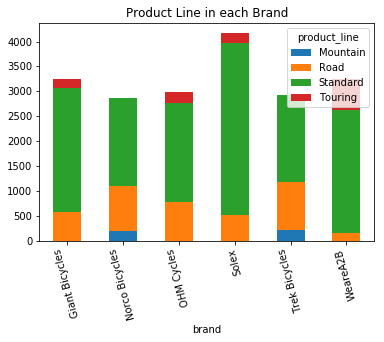

In [91]:
pd.crosstab(data.brand, data.product_line).plot(kind='bar', stacked=True)
plt.xticks(rotation=105)
plt.title('Product Line in each Brand')
plt.show()

#### Observations:
    Highest selling brand         : Solex
    Highest Selling Product size  : Medium
    Highest Selling Product Class : Medium
    Highest Selling Product line  : Standard

### Gender based Analysis

Text(0.5, 1.0, 'Number of transactions per gender')

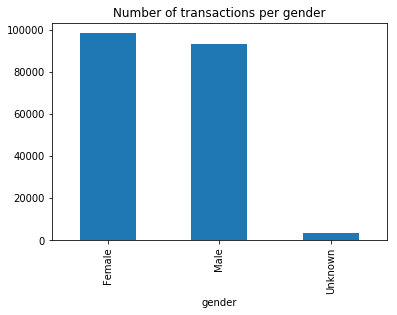

In [92]:
Customer_state = customer.groupby("gender").past_3_years_bike_related_purchases.sum()
Customer_state.plot(kind='bar')
plt.title('Number of transactions per gender')

Text(0.5, 1.0, 'Number of Brands used per gender')

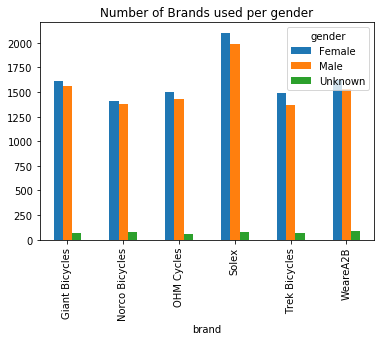

In [93]:
pd.crosstab(data.brand, data.gender).plot(kind='bar', stacked=False)
plt.title('Number of Brands used per gender')

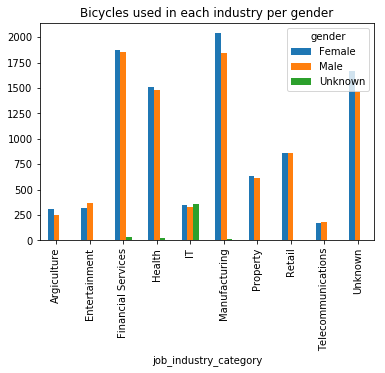

In [94]:
pd.crosstab(data.job_industry_category, data.gender).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each industry per gender')
plt.show()

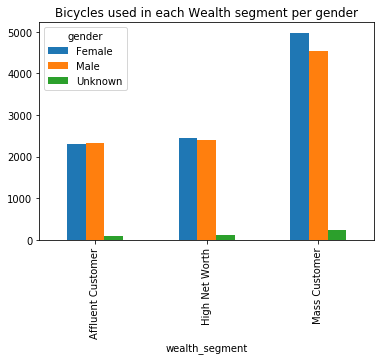

In [95]:
pd.crosstab(data.wealth_segment, data.gender).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each Wealth segment per gender')
plt.show()

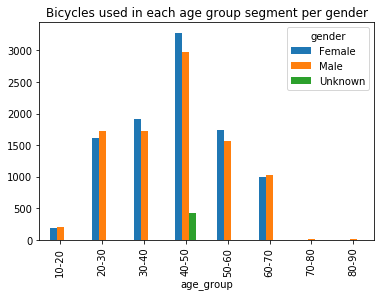

In [96]:
pd.crosstab(data.age_group, data.gender).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each age group segment per gender')
plt.show()

#### Observations :- Gender Based Analysis
    Largest buyer                                   : Female 
    Highest Selling Brand by Females                : Solex
    Highest Selling in Industry category by Females : Manufacturing 
    Highest Selling in wealth segment by females    : Mass Customers
    Highest selling in Age group by Females 		: 40-50

### State Based Analysis

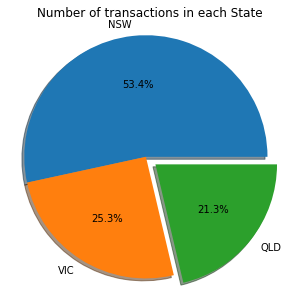

In [97]:
x = data['state']
x = x.value_counts(normalize=True)*100
x=x.reset_index()
labels = x['index']

explode = [0.0,0.0,0.1];
fig,ax = plt.subplots(figsize=(5,5))
plt.pie(x['state'], explode=explode, labels = labels,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Number of transactions in each State')
plt.show()

In [98]:
import plotly.express as px
px.scatter(data_frame=data, x='state', y='gender', size='past_3_years_bike_related_purchases')

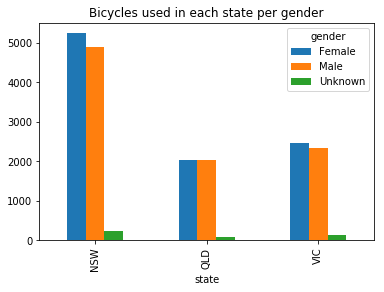

In [99]:
pd.crosstab(data.state, data.gender).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each state per gender')
plt.show()

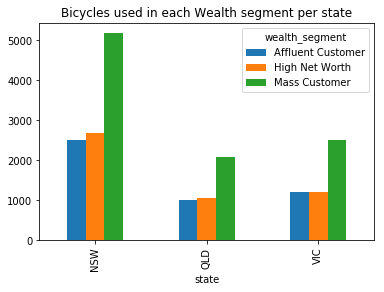

In [100]:
pd.crosstab(data.state, data.wealth_segment).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each Wealth segment per state')
plt.show()

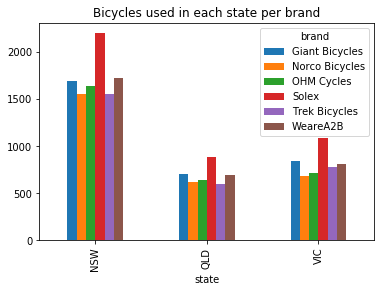

In [101]:
pd.crosstab(data.state, data.brand).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each state per brand')
plt.show()

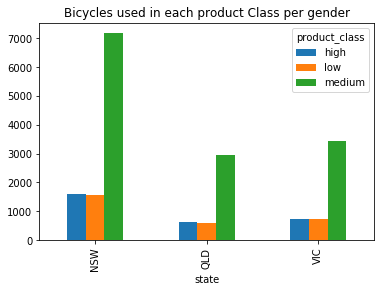

In [102]:
pd.crosstab(data.state, data.product_class).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each product Class per gender')
plt.show()

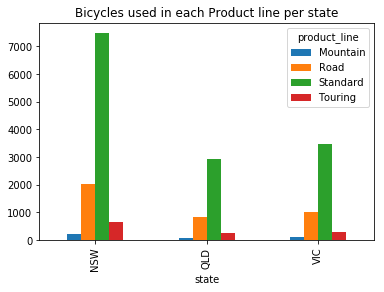

In [103]:
pd.crosstab(data.state, data.product_line).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each Product line per state')
plt.show()

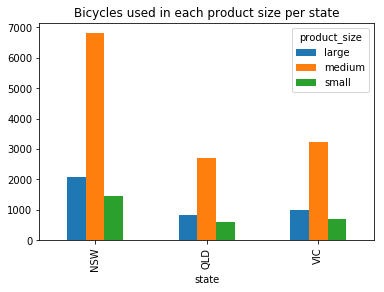

In [104]:
pd.crosstab(data.state, data.product_size).plot(kind='bar', stacked=False)
plt.title('Bicycles used in each product size per state')
plt.show()

Text(0.5, 1.0, 'Number of transactions per state')

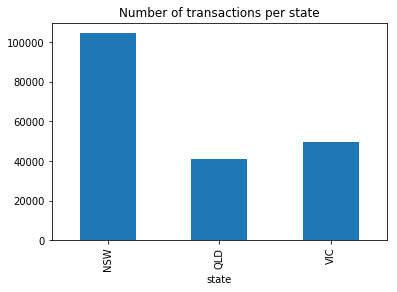

In [105]:
Customer_state = customer.groupby("state").past_3_years_bike_related_purchases.sum()
Customer_state.plot(kind='bar')
plt.title('Number of transactions per state')

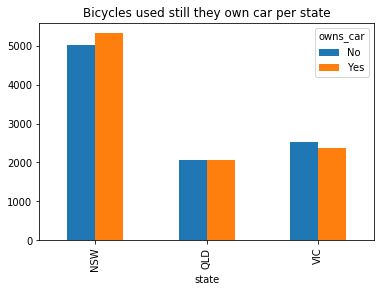

In [106]:
pd.crosstab(data['state'],data['owns_car']).plot(kind='bar')
plt.title('Bicycles used still they own car per state')
plt.show()

#### Observations :
    Highest selling states      : NSW
    Gender contribution         : Female
    wealth segment contribution : Mass customers
    Brand contribution          :Solex
    Car Owns highest in         : NWS



### Age Group Analysis

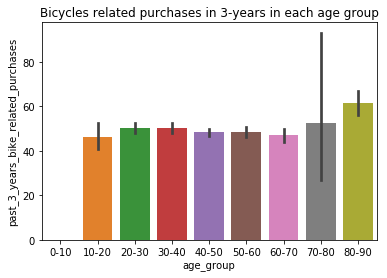

In [107]:
sns.barplot(x = "age_group",y= "past_3_years_bike_related_purchases",data = customer)
plt.title('Bicycles related purchases in 3-years in each age group')
plt.show()

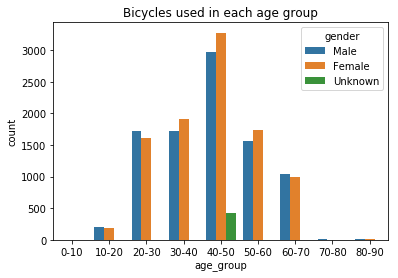

In [117]:
sns.countplot(x = "age_group",data = data,hue="gender")
plt.title('Bicycles used in each age group')
plt.show()

In [ ]:
plt.figure(figsize=(11,8))
sns.barplot(x=data.job_industry_category,y=data.list_price,hue=data.gender)

### Observations :
    We can see that age group 80-90 are having highest purchase realted to bike
    Highest sales contributed from age group 40-50

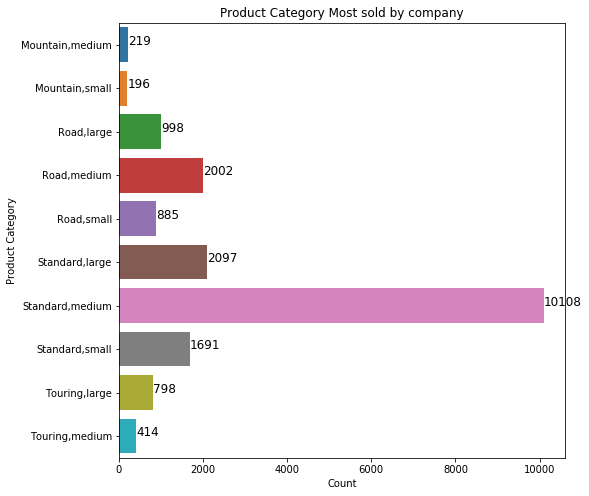

In [109]:
product = data[['product_line','product_size']]
product = product.groupby(['product_line','product_size']).agg(len).reset_index()
product['Product'] = product['product_line'].str.cat(product['product_size'], sep =",")
product = product[['Product',0]]
product.columns = ['Product Category','Count']
val = product['Count']

fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'Count', y='Product Category',data=product,ax=ax)
plt.title('Product Category Most sold by company')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

### Observations :
    Here we can see Standard,medium are having highest sales. 
    Followed by standard,large

C:\Users\Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



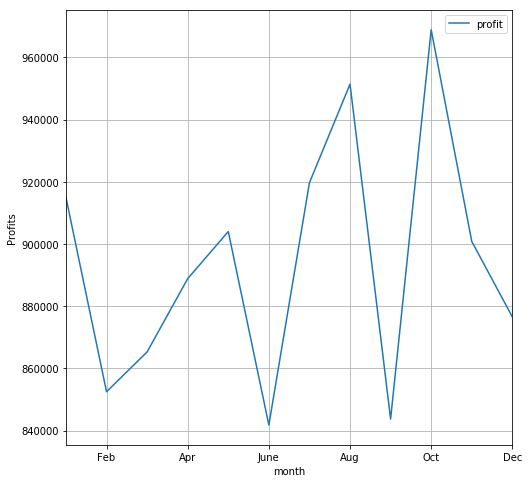

In [110]:
year_profit = transactions[['transaction_date','profit']]
year_profit['month'] = pd.DatetimeIndex(year_profit['transaction_date']).month
month_profit = year_profit.groupby(['month']).agg(sum)
month_profit.reset_index(inplace=True)
fig,ax=plt.subplots(figsize=(8,8))
month_profit.plot(x = 'month',y='profit',kind='line',ax=ax,grid=True)
plt.ylabel('Profits')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','June','Aug','Oct','Dec'])
plt.show()

### Recommendations :
 1.   We can clearly see that New South Wales state has highest sales. The marketing startegy of this       state has to be applied to other states to boost sales irrespective of the customer's wealth           segment, work industry or gender.
 2.   Most sales are done by females has high chance of approval
 3.   Solex & Giant Bicycles Brand will be on high demand 
 4.   Standard Product line have hugh transaction. 
 5.   Product class  Medium is have very good demand 

    

### Export to Excel file

In [111]:
with pd.ExcelWriter('KPMG_VI_New_raw_data_cleaned.xlsx') as writer:
    data.to_excel(writer, sheet_name='OldCustomers')
    new_customer_lists.to_excel(writer, sheet_name='NewCustomers')

# Modelling

### MODEL DEVELOPMENT USING K-MEANS CLUSTERING


In [112]:
new_customer_lists.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'age'],
      dtype='object')

In [119]:
new_customer_lists.describe()

customer_id  past_3_years_bike_related_purchases       tenure  \
count  1000.000000                          1000.000000  1000.000000   
mean   4503.500000                            49.836000    11.388000   
std     288.819436                            27.796686     5.037145   
min    4004.000000                             0.000000     0.000000   
25%    4253.750000                            26.750000     7.000000   
50%    4503.500000                            51.000000    11.000000   
75%    4753.250000                            72.000000    15.000000   
max    5003.000000                            99.000000    22.000000   

          postcode  property_valuation          age  
count  1000.000000         1000.000000  1000.000000  
mean   3019.227000            7.397000    49.152000  
std     848.895767            2.758804    16.933447  
min    2000.000000            1.000000    18.000000  
25%    2209.000000            6.000000    37.750000  
50%    2800.000000            8.000000    48.000000  
75%    3845.500000            9.000000    63.000000  
max    4879.000000           12.000000    82.000000

### Customer Segmentation on Age

In [130]:
x= new_customer_lists.iloc[:,[16,4]].values
x

array([[63., 86.],
       [50., 69.],
       [46., 10.],
       ...,
       [66., 17.],
       [68., 30.],
       [65., 56.]])

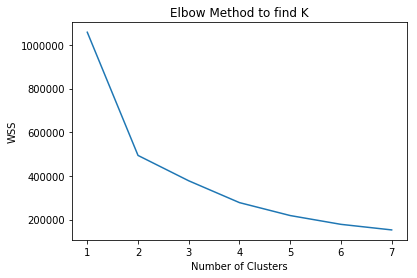

In [131]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=23)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
plt.plot(range(1,8),wss)
plt.title('Elbow Method to find K')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

As the number of clusters increases, the value of wcss decreases. The optimal number of clusters is 5.

In [144]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=23)
pred_kmeans = kmeans.fit_predict(x)

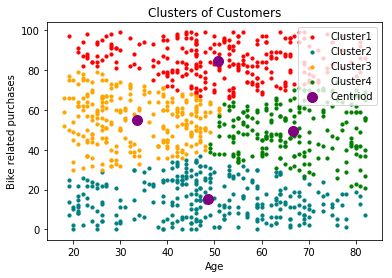

In [148]:
plt.scatter(x[pred_kmeans==0,0],x[pred_kmeans==0,1],s=10,c='red',label='Cluster1')
plt.scatter(x[pred_kmeans==1,0],x[pred_kmeans==1,1],s=10,c='teal',label='Cluster2')
plt.scatter(x[pred_kmeans==2,0],x[pred_kmeans==2,1],s=10,c='orange',label='Cluster3')
plt.scatter(x[pred_kmeans==3,0],x[pred_kmeans==3,1],s=10,c='green',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='purple',label='Centriod')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Bike related purchases')
plt.legend()
plt.show()

### Customer Segmentation Based on Postal code


In [122]:
x= new_customer_lists.iloc[:,[12,4]].values


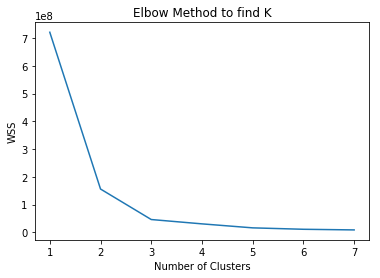

In [123]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=23)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
plt.plot(range(1,8),wss)
plt.title('Elbow Method to find K')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

As the number of clusters increases, the value of wcss decreases. The optimal number of clusters is 3.

In [126]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=23)
pred_kmeans = kmeans.fit_predict(x)

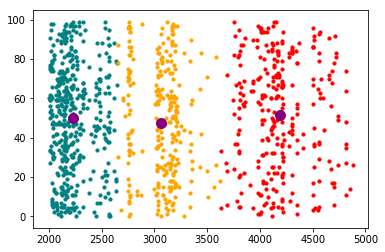

In [127]:
plt.scatter(x[pred_kmeans==0,0],x[pred_kmeans==0,1],s=10,c='red',label='Cluster1')
plt.scatter(x[pred_kmeans==1,0],x[pred_kmeans==1,1],s=10,c='teal',label='Cluster2')
plt.scatter(x[pred_kmeans==2,0],x[pred_kmeans==2,1],s=10,c='orange',label='Cluster3')
plt.scatter(x[pred_kmeans==3,0],x[pred_kmeans==3,1],s=10,c='green',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='purple',label='Centriod')